# Pobreza y desigualdad

- [Plataforma de pobreza y desigualdad del Banco Mundial](https://pip.worldbank.org/home)
- [Methodology](https://datanalytics.worldbank.org/PIP-Methodology/)
- [API](https://pip.worldbank.org/poverty-calculator)

La línea de pobreza de este set de datos se calcula tomando la mediana de la parte superior de los países de mediano ingreso. Esta se encuentra situada en los 6.85 dólares estadounidendes (base = 2017)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df = pd.read_csv("..\\DataSets\\WBPIP\\pip2.csv")

In [ ]:
df.iloc[:, 6:]

#### Dejamos por fuera las columnas con metadata. También las mediciones por deciles, debido a que ya contamos con índices para medir pobreza y desigualdad

In [6]:
df = pd.read_csv("..\\DataSets\\WBPIP\\pip2.csv", 
                 usecols= ['region_name', 'country_name','reporting_year', 'poverty_line',
                           'headcount','poverty_gap', 'poverty_severity','watts', 'mld', 'gini','polarization','cpi', 'ppp', 
                            'reporting_pop', 'reporting_gdp'])

## Antes que nada vamos a filtrar los años que nos interesan

In [7]:
df.reporting_year.min()

1967

In [8]:
df.reporting_year.max()

2021

### debido a falta de datos acotaremos este set en el año 2019.

In [9]:
df = df[df.reporting_year >= 1990 ]
df = df[df.reporting_year < 2020 ]

In [10]:
df.head()

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.35,0.23,0.64,0.51,0.52,0.46,0.01,107.27,16395477,"2,451.51"
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.33,0.19,0.52,0.31,0.43,0.39,0.30,107.27,21695636,"4,077.78"
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.45,0.30,0.82,0.48,0.51,0.47,1.23,107.27,30809787,"3,595.11"
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.14,0.06,0.18,0.12,0.27,0.24,0.40,50.36,3168033,"1,633.55"
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.16,0.07,0.22,0.16,0.32,0.27,0.70,50.36,3051010,"2,247.50"


In [11]:
df.tail()

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
2204,Sub-Saharan Africa,Zambia,2010,6.85,0.93,0.70,0.56,1.54,0.54,0.56,0.54,0.55,4.22,13605986,"1,214.69"
2205,Sub-Saharan Africa,Zambia,2015,6.85,0.91,0.66,0.52,1.48,0.60,0.57,0.61,0.80,4.22,15879370,"1,338.29"
2206,Sub-Saharan Africa,Zimbabwe,2011,6.85,0.78,0.40,0.24,0.66,0.31,0.43,0.39,0.98,0.49,12894323,"1,248.73"
2207,Sub-Saharan Africa,Zimbabwe,2017,6.85,0.84,0.49,0.32,0.84,0.32,0.44,0.42,1.00,0.49,14236599,"1,479.38"
2208,Sub-Saharan Africa,Zimbabwe,2019,6.85,0.85,0.52,0.36,0.94,0.43,0.50,0.46,1.00,0.49,14645473,"1,414.83"


In [12]:
df.shape

(2035, 15)

#### Ya contamos con un dataset que contiene la población de los países, eliminaremos la columna 'reporting_population'

In [13]:
df.drop(columns = 'reporting_pop', inplace = True)

#### Lo mismo sucede con la categoría reporting_gdp que mide el ingreso por habitante de un país

In [14]:
df.drop(columns = 'reporting_gdp', inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region_name       2035 non-null   object 
 1   country_name      2035 non-null   object 
 2   reporting_year    2035 non-null   int64  
 3   poverty_line      2035 non-null   float64
 4   headcount         2034 non-null   float64
 5   poverty_gap       2034 non-null   float64
 6   poverty_severity  2034 non-null   float64
 7   watts             2034 non-null   float64
 8   mld               2031 non-null   float64
 9   gini              2031 non-null   float64
 10  polarization      2031 non-null   float64
 11  cpi               2035 non-null   float64
 12  ppp               1984 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 222.6+ KB


### Chequeo de valores nulos

In [16]:
df.isna().any().any()

True

In [17]:
df.isna().mean() * 100

region_name        0.00
country_name       0.00
reporting_year     0.00
poverty_line       0.00
headcount          0.05
poverty_gap        0.05
poverty_severity   0.05
watts              0.05
mld                0.20
gini               0.20
polarization       0.20
cpi                0.00
ppp                2.51
dtype: float64

#### Como tenemos varios índices, algunos para medir la pobreza y otros para medir la desigualdad, queremos asegurarnos de no analizar variables que tengan una alta correlación.

In [18]:
df = df[df.gini.isna() == False]

La paridad de poder adquisitivo (columna ppp), tiene un valor único para cada país; solo muestra cual es el poder de compra de los ciudadanos de ese país en base 2017, no está ajustado por año. En consecuencia, no es un dato que vayamos a utilizar, así que en lugar de eliminar o tratar sus valores nulos; eliminaremos esta columna.

In [19]:
df.drop(columns = 'ppp', inplace= True ) 

Volvemos a chequear los registros nulos

In [20]:
df.isna().mean() * 100

region_name        0.00
country_name       0.00
reporting_year     0.00
poverty_line       0.00
headcount          0.00
poverty_gap        0.00
poverty_severity   0.00
watts              0.00
mld                0.00
gini               0.00
polarization       0.00
cpi                0.00
dtype: float64

#### Vamos a filtrar los índices de pobreza y desigualdad para medir su correlatividad

In [21]:
dfc = df[['poverty_line','headcount','poverty_gap','poverty_severity','watts','mld','gini','polarization','cpi']]

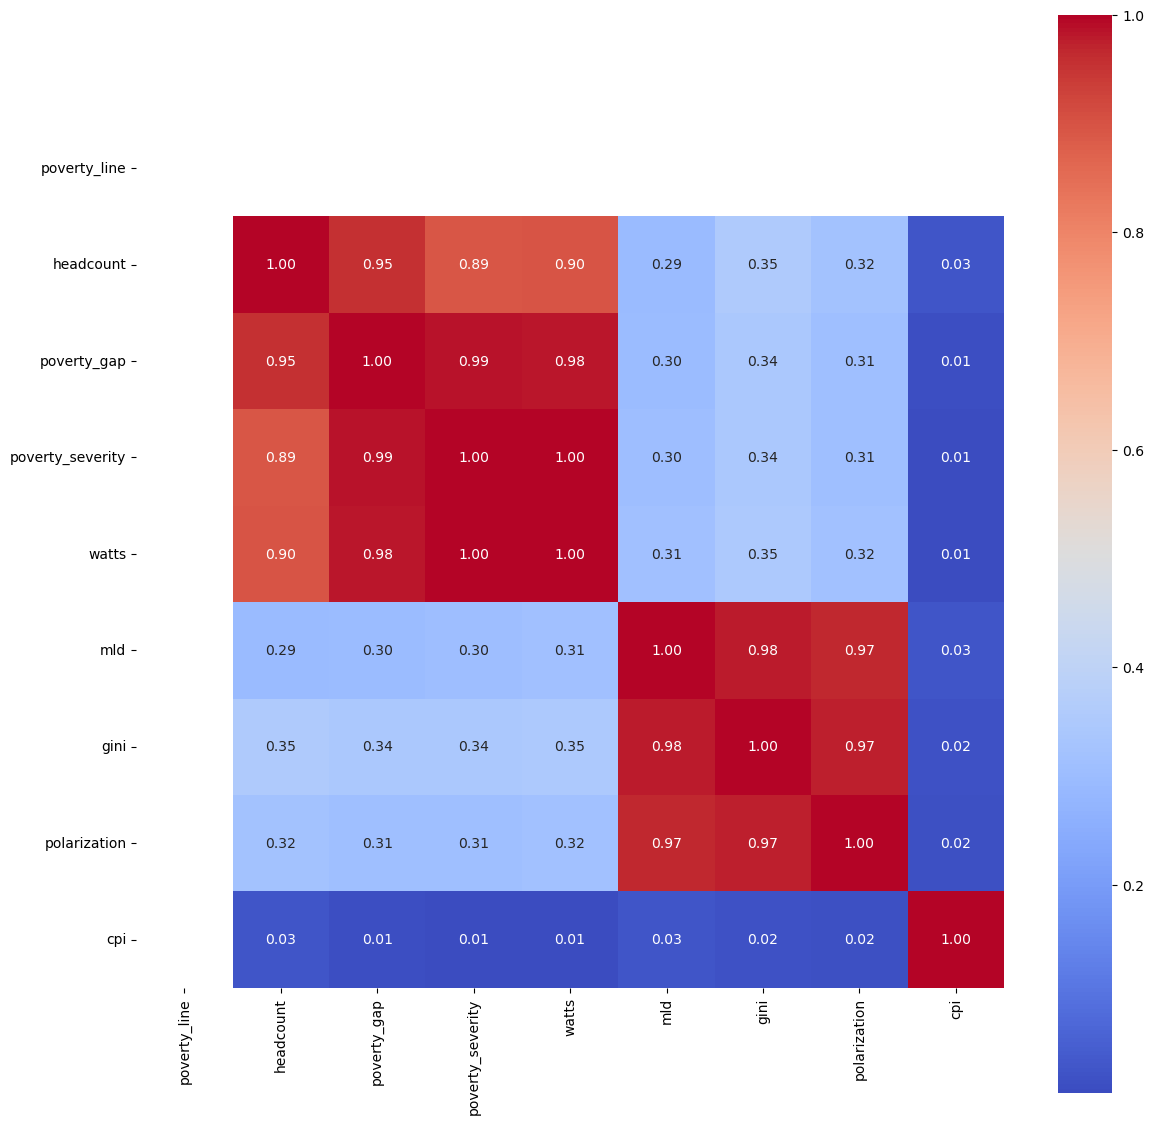

In [22]:
corr = dfc.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= dfc.columns, 
           yticklabels= dfc.columns,
           cmap= 'coolwarm')
plt.show()

La columna "poverty_line" tiene un solo valor único, por lo tanto al carecer de variabilidad no hay una correlación que pueda ser cuantificada. Esto se expresa en el gráfico como celdas faltantes.

#### Vemos que los indicadores de pobreza, en el cuadrante superior izquierdo, tienen alta correlatividad entre sí. Lo mismo ocurre con los indicadores de desigualdad (cuadrado rojo en el medio del gráfico). Vamos a eliminar algunas de estas columnas. 

Los métodos poverty severity y headcount sirven para medir la pobreza, el primero es más elaborado y tiene en cuenta
cuestiones de desigualdad, mientras que el primero es una simple proporción poblacional. Sin embargo en este trabajo 
no vamos a tener en cuenta estas cuestiones técnicas, priorizaremos no incluir campos con alta correlatividad y que 
pertenezcan a una misma categoría.

In [23]:
df.drop(columns = ['poverty_gap', 'poverty_severity', 'watts'], inplace = True ) 

In [24]:
df.drop(columns = ['mld','polarization'], inplace = True)

In [25]:
df

,region_name,country_name,reporting_year,poverty_line,headcount,gini,cpi
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.52,0.01
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.43,0.30
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.51,1.23
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.27,0.40
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.32,0.70
...,...,...,...,...,...,...,...
2204,Sub-Saharan Africa,Zambia,2010,6.85,0.93,0.56,0.55
2205,Sub-Saharan Africa,Zambia,2015,6.85,0.91,0.57,0.80
2206,Sub-Saharan Africa,Zimbabwe,2011,6.85,0.78,0.43,0.98
2207,Sub-Saharan Africa,Zimbabwe,2017,6.85,0.84,0.44,1.00


### Renombraremos a la columna country_year y normalizaremos los valores de los campos de texto

In [26]:
df.rename(columns = {'reporting_year' : 'year'}, inplace = True)

### Veamos que información preeliminar podemos obtener de estos campos

In [27]:
df.region_name.unique()

array(['Sub-Saharan Africa', 'Europe & Central Asia',
       'Other High Income Countries', 'Latin America & Caribbean',
       'South Asia', 'East Asia & Pacific', 'Middle East & North Africa'],
      dtype=object)

In [28]:
df.duplicated().sum()

0

In [29]:
len(df.country_name.unique())

169

In [30]:
df.iloc[:, 4:].describe()

,headcount,gini,cpi
count,"2,031.00","2,031.00","2,031.00"
mean,0.36,0.38,17.57
std,0.34,0.09,173.69
min,0.00,0.20,0.00
25%,0.03,0.31,0.55
50%,0.27,0.36,0.83
75%,0.65,0.43,0.98
max,1.00,0.66,"4,225.82"


## Proporción de pobreza poblacional ('headcount')

In [31]:
df.headcount.describe()

count   2,031.00
mean        0.36
std         0.34
min         0.00
25%         0.03
50%         0.27
75%         0.65
max         1.00
Name: headcount, dtype: float64

Text(0, 0.5, 'Registros')

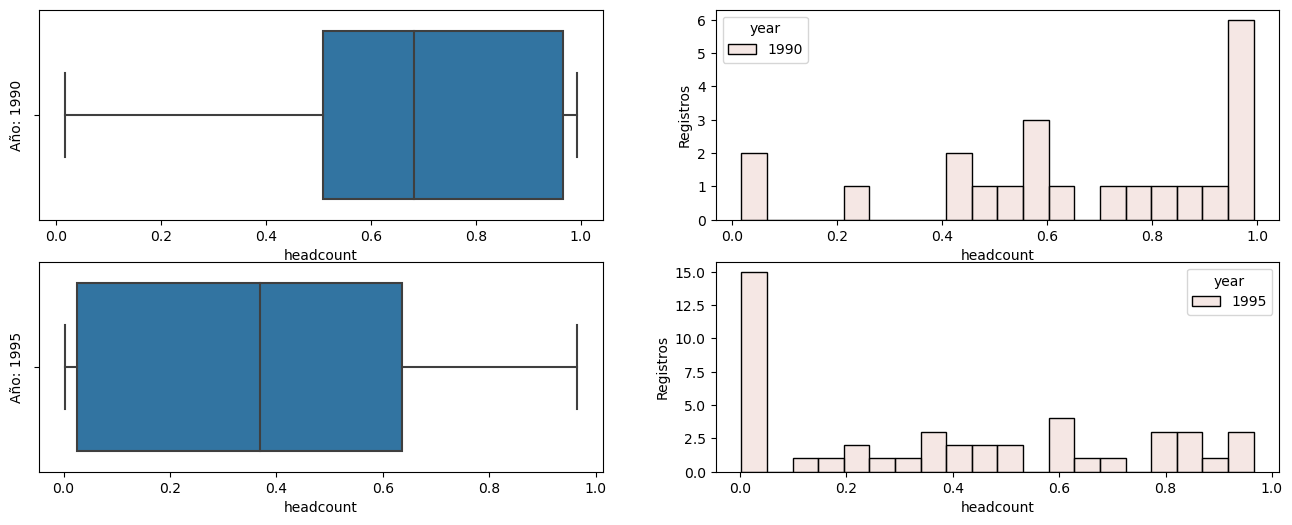

In [32]:
df_1990 = df[df['year'] == 1990]
df_1995 = df[df['year'] == 1995]

fig, axs = plt.subplots(2, 2,  figsize=(16, 6))
sns.boxplot(x='headcount', data=df_1990, ax=axs[0,0], hue='year')
sns.histplot(x='headcount', data=df_1990, bins=20, kde=False, ax=axs[0,1], hue='year')
sns.boxplot(x='headcount', data=df_1995, ax=axs[1,0], hue='year')
sns.histplot(x='headcount', data=df_1995, bins=20, kde=False, ax=axs[1,1], hue='year')
axs[0,0].set_ylabel('Año: 1990')
axs[1,0].set_ylabel('Año: 1995')
axs[0,1].set_ylabel('Registros')
axs[1,1].set_ylabel('Registros')

Text(0, 0.5, 'Registros')

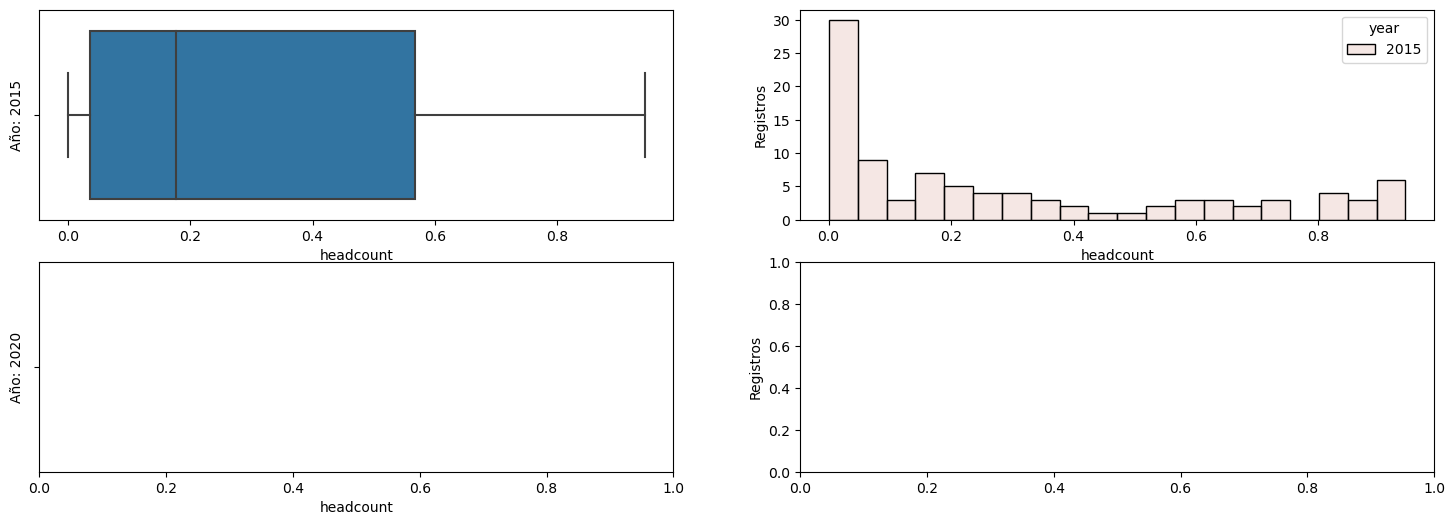

In [33]:
df_2020 = df[df['year'] == 2020]
df_2015 = df[df['year'] == 2015]

fig, axs = plt.subplots(2, 2,  figsize=(18, 6))
sns.boxplot(x='headcount', data=df_2015, ax=axs[0,0], hue='year')
sns.histplot(x='headcount', data=df_2015, bins=20, kde=False, ax=axs[0,1], hue='year')
sns.boxplot(x='headcount', data=df_2020, ax=axs[1,0], hue='year')
sns.histplot(x='headcount', data=df_2020, bins=20, kde=False, ax=axs[1,1], hue='year')

axs[0,0].set_ylabel('Año: 2015')
axs[1,0].set_ylabel('Año: 2020')
axs[0,1].set_ylabel('Registros')
axs[1,1].set_ylabel('Registros')

Las distribuciones suelen variar mucho, por lo que no podemos ser concluyentes. De todas maneras, se puede apreciar un desplazamiento hacia la derecha de la distribución, lo que sugiere una caída en la pobreza calculada con una línea de 6.85 dólares diarios.

### A lo largo del tiempo

In [34]:
grouped = df.groupby('year')
result = grouped['headcount'].median()
#print(result)

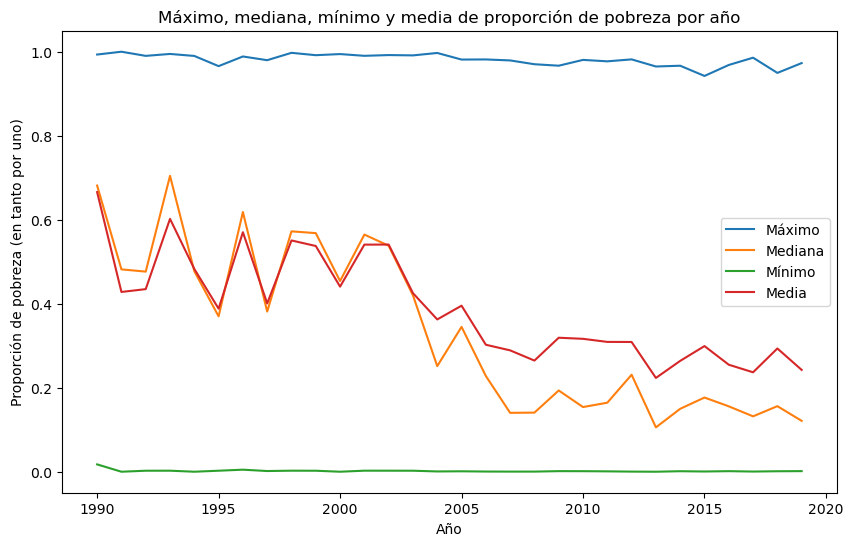

In [35]:
# Agrupar por año y calcular la mediana, el mínimo y el máximo de headcount
grouped = df.groupby('year')['headcount']
result = grouped.agg(['median', 'min', 'max'])

# Crear un gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(result.index, result['max'], label='Máximo')
ax.plot(result.index, result['median'], label='Mediana')
ax.plot(result.index, result['min'], label='Mínimo')
ax.plot(result.index, grouped.mean(), label='Media')

# Configurar el gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Proporción de pobreza (en tanto por uno)')
ax.set_title('Máximo, mediana, mínimo y media de proporción de pobreza por año')
ax.legend()
plt.show()

Lo que podemos notar es que hasta el año 2019, el máximo de la proporción de pobreza se mantiene casi inalterado, cercano al 1, lo que nos habla de que existen Estados o territorios, en los que la pobreza no ha podido ser erradicada. El resultado del año 2020 nos llama la atención pero tendemos a pensar que se debe a una distorsión en los datos y no a una distorsión y no a una caída real de ese núcleo de poblaciones pobres. Por otro lado la mediana y la media muestras una clara tendencia a la caída por lo que se puede hablar de una caída de la proporción de la pobreza en términos generales. En el otro extremo del gráfico los valores cercanos o iguales a cero nos hablan de un núcleo de riqueza que ha permanecido inalterada a lo largo de los años. 

In [36]:
df.head()

,region_name,country_name,year,poverty_line,headcount,gini,cpi
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.52,0.01
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.43,0.30
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.51,1.23
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.27,0.40
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.32,0.70


## Desigualdad

Este dataset utiliza el índice de Gini como medida de desigualdad de los ingresos de la población, un índice cercano a cero habla de una mejor distribución de los ingresos, mientras que un número cercano a uno habla de una distribución desigual.

In [37]:
df

,region_name,country_name,year,poverty_line,headcount,gini,cpi
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.52,0.01
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.43,0.30
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.51,1.23
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.27,0.40
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.32,0.70
...,...,...,...,...,...,...,...
2204,Sub-Saharan Africa,Zambia,2010,6.85,0.93,0.56,0.55
2205,Sub-Saharan Africa,Zambia,2015,6.85,0.91,0.57,0.80
2206,Sub-Saharan Africa,Zimbabwe,2011,6.85,0.78,0.43,0.98
2207,Sub-Saharan Africa,Zimbabwe,2017,6.85,0.84,0.44,1.00


Text(0, 0.5, 'Registros')

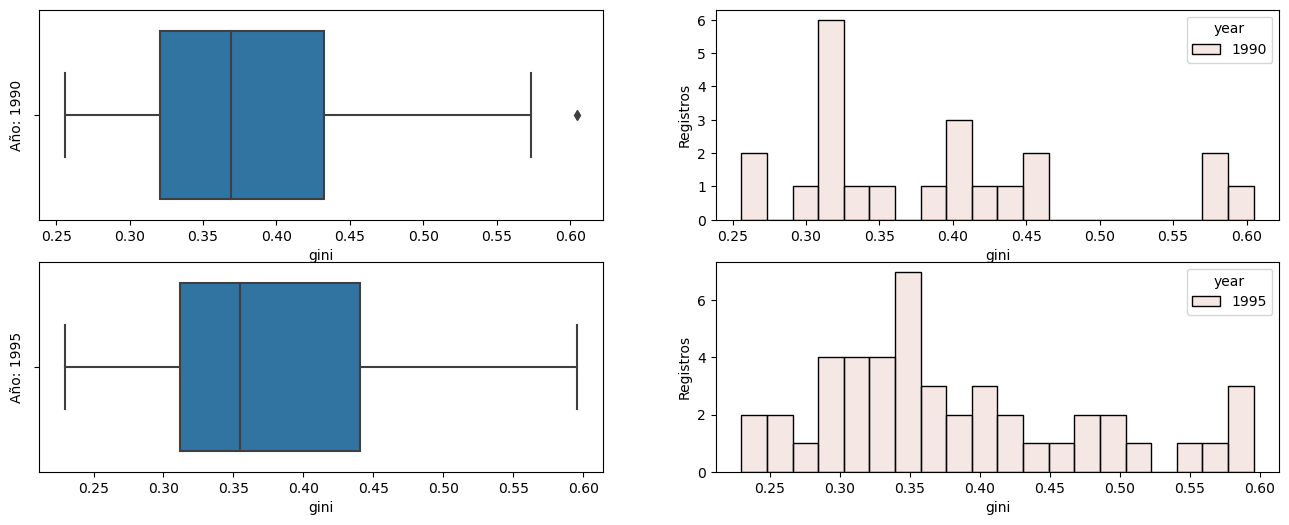

In [38]:
df_1990 = df[df['year'] == 1990]
df_1995 = df[df['year'] == 1995]

fig, axs = plt.subplots(2, 2,  figsize=(16, 6))
sns.boxplot(x='gini', data=df_1990, ax=axs[0,0], hue='year')
sns.histplot(x='gini', data=df_1990, bins=20, kde=False, ax=axs[0,1], hue='year')
sns.boxplot(x='gini', data=df_1995, ax=axs[1,0], hue='year')
sns.histplot(x='gini', data=df_1995, bins=20, kde=False, ax=axs[1,1], hue='year')
axs[0,0].set_ylabel('Año: 1990')
axs[1,0].set_ylabel('Año: 1995')
axs[0,1].set_ylabel('Registros')
axs[1,1].set_ylabel('Registros')

Text(0, 0.5, 'Registros')

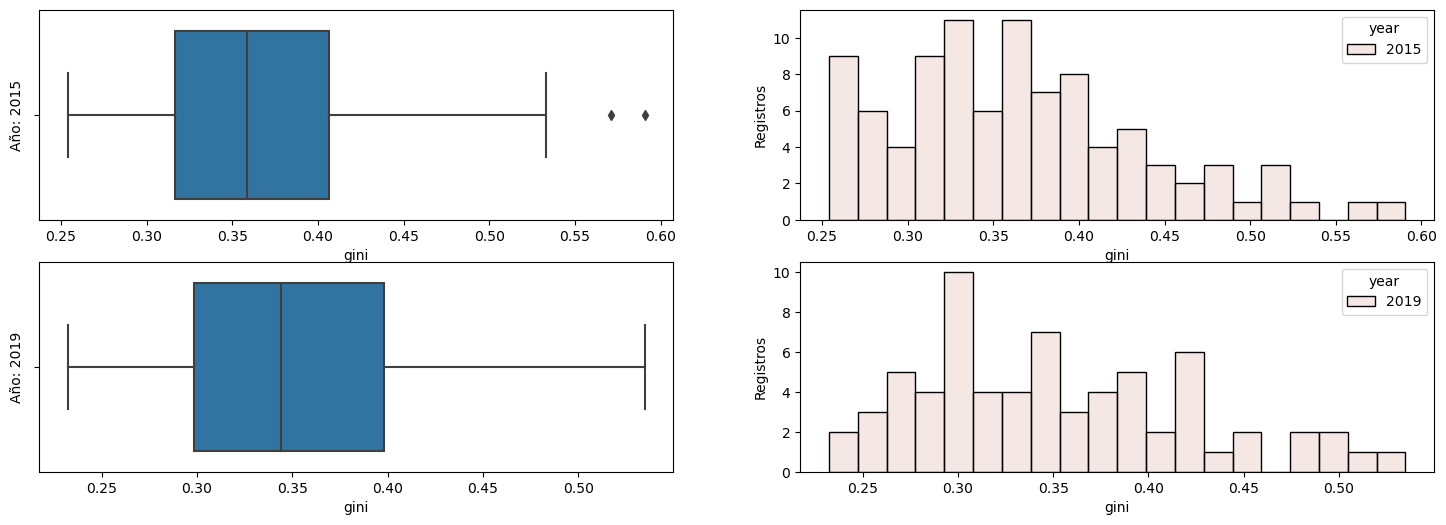

In [39]:
df_2019 = df[df['year'] == 2019]
df_2015 = df[df['year'] == 2015]

fig, axs = plt.subplots(2, 2,  figsize=(18, 6))
sns.boxplot(x='gini', data=df_2015, ax=axs[0,0], hue='year')
sns.histplot(x='gini', data=df_2015, bins=20, kde=False, ax=axs[0,1], hue='year')
sns.boxplot(x='gini', data=df_2019, ax=axs[1,0], hue='year')
sns.histplot(x='gini', data=df_2019, bins=20, kde=False, ax=axs[1,1], hue='year')

axs[0,0].set_ylabel('Año: 2015')
axs[1,0].set_ylabel('Año: 2019')
axs[0,1].set_ylabel('Registros')
axs[1,1].set_ylabel('Registros')

A excepción del año 2015 la tendencia general observada es un desplazamiento de los gráficos hacia la derecha, lo que implicaría un aumento en la desigualdad de los países.

### Gini a lo largo del tiempo

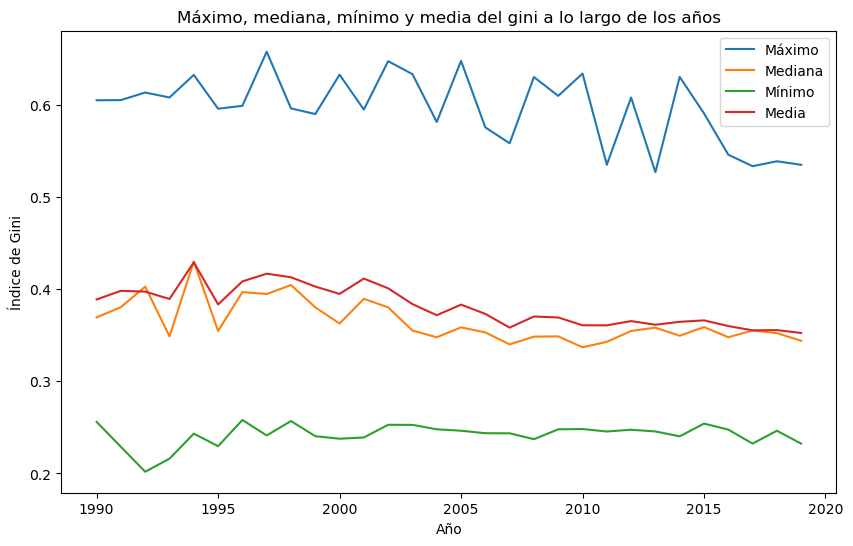

In [40]:
# Agrupar por año y calcular la mediana, el mínimo y el máximo de headcount
grouped = df.groupby('year')['gini']
result = grouped.agg(['median', 'min', 'max'])

# Crear un gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(result.index, result['max'], label='Máximo')
ax.plot(result.index, result['median'], label='Mediana')
ax.plot(result.index, result['min'], label='Mínimo')
ax.plot(result.index, grouped.mean(), label='Media')

# Configurar el gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Índice de Gini')
ax.set_title('Máximo, mediana, mínimo y media del gini a lo largo de los años')
ax.legend()
plt.show()

Los datos sugieren una mejora moderada de la desigualdad en la zona de mayor desigualdad mientras la media, la mediana y el 
registro mínimo de cada año no muestran demasiados cambios. Esto contradice en cierta manera lo observado mas arriba, por lo que debería ser investigado más a fondo.

## Inflación -- Bloque interrumpido, se eliminó la columna por inconsistencias--

En este dataset se utiliza el índice de precios al consumidor (cpi en inglés) para medir la evolución general de los precios a lo largo del tiempo.

Text(0, 0.5, 'Registros')

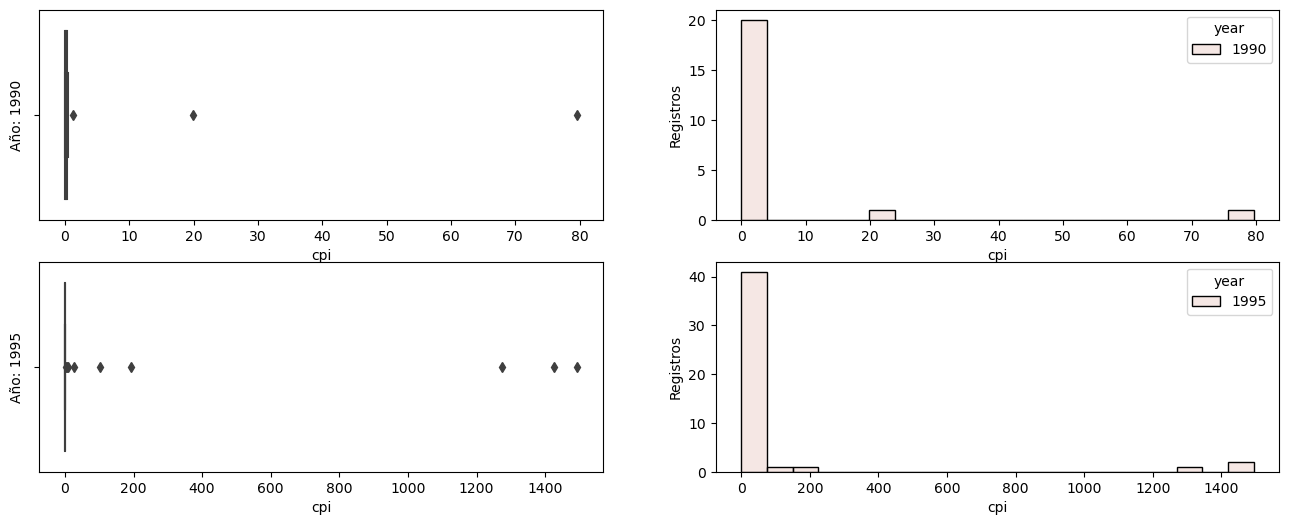

In [41]:
df_1990 = df[df['year'] == 1990]
df_1995 = df[df['year'] == 1995]

fig, axs = plt.subplots(2, 2,  figsize=(16, 6))
sns.boxplot(x='cpi', data=df_1990, ax=axs[0,0], hue='year')
sns.histplot(x='cpi', data=df_1990, bins=20, kde=False, ax=axs[0,1], hue='year')
sns.boxplot(x='cpi', data=df_1995, ax=axs[1,0], hue='year')
sns.histplot(x='cpi', data=df_1995, bins=20, kde=False, ax=axs[1,1], hue='year')
axs[0,0].set_ylabel('Año: 1990')
axs[1,0].set_ylabel('Año: 1995')
axs[0,1].set_ylabel('Registros')
axs[1,1].set_ylabel('Registros')

Los datos de Italia no son correctos, vamos a corregirlos. Hemos notado que estos datos presentas dos errores, uno tienen una coma que convierte a alguno de los valores en miles. El otro que tiene una inflación que supera en más de diez veces su inflación real. Por esta razón dividiremos por diez el valor actual. En cuanto a los valores con coma vamos a restarle mil y luego a dividir por 10.

In [42]:
for i in range(1126, 1147):
    df.at[i,'cpi'] = 0.02
    

Al investigar más a fondo la columna 'cpi' notamos que no solo Italia tiene datos incorrectos, parece como si la columna hubiese sido rellanada por distintas personas y con distintas metodologías, algunos datos son correctos, otros muy errados. Algunos datos están en tanto por cien, mientras que otros en tanto por uno. Desecharemos esta columna.

In [43]:
df.drop(columns = 'cpi', inplace = True)

## ETL 

Comenzaremos esta etapa del ETL con los registros que son duplicados parciales. En lugar de eliminarlos vamos a agruparlos, obtener los valores medios para cada campo y cada subgrupo de duplicados parciales, para luego imputar esa media sobre los valores originales. De esta manera crearemos registros duplicados y podremos quedarnos con uno solo de cada subgrupo. 

In [44]:
# Filtramos el DataFrame para que solo contenga registros duplicados parciales
duplicates = df.duplicated(subset=['year', 'country_name'], keep=False)
dfd = df[duplicates]

#### Iniciamos con la columna 'gini'

In [45]:
# Agrupamos las filas por 'year' y 'country_name'. Luego calculamos el valor medio de 'gini' 
# de los duplicados parciales. Hacemos lo mismo para los otros dos campos. 
gini_mean = dfd.groupby(['year', 'country_name'])['gini'].mean().reset_index()

In [46]:
# hacemos un merge para incorporar la columna 'gini_mean' a nuestro dataframe original, lo guardamos en otra variable.
dfg = df.merge(gini_mean, on=['year', 'country_name'], how = 'left', suffixes=('', '_mean'))

In [47]:
# ahora, para todos los valores en que 'gini_mean' != null asignamos ese valor en 'gini'
dfg.loc[~dfg['gini_mean'].isnull(), 'gini'] = dfg.loc[~dfg['gini_mean'].isnull(), 'gini_mean']

In [48]:
# dropeamos la columna auxiliar
dfg.drop(columns = 'gini_mean', inplace = True)

#### repetimos el procedimiento para la columna 'headcount'

In [49]:
headcount_mean = dfd.groupby(['year', 'country_name'])['headcount'].mean().reset_index()
dfg = dfg.merge(headcount_mean, on=['year', 'country_name'], how = 'left', suffixes=('', '_mean'))
dfg.loc[~dfg['headcount_mean'].isnull(), 'headcount'] = dfg.loc[~dfg['headcount_mean'].isnull(), 'headcount_mean']
dfg.drop(columns = 'headcount_mean', inplace = True)

#### Dropeamos los registros duplicados

In [50]:
df = dfg.drop_duplicates()

In [51]:
df.duplicated().sum()

0

In [52]:
len(df.country_name.unique())

169

In [53]:
df= df.copy()

#### Normalizaremos el tipo de dato de la columna year

In [54]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

#### Convertimos nuestros valores de texto a mayúsculas

In [55]:
df.region_name = df.region_name.apply(lambda x: x.upper())
df.country_name = df.country_name.apply(lambda x: x.upper())

In [56]:
df.reset_index(drop=True, inplace = True)

## Por último normalizamos los nombres de países

In [59]:
est = pd.read_csv('..\\DataSets\\estandar_paises_regiones.csv')

In [60]:
est

,region_name,sub-region_name,country_name,iso
0,AFRICA,NORTHERN AFRICA,ALGERIA,DZA
1,AFRICA,NORTHERN AFRICA,EGYPT,EGY
2,AFRICA,NORTHERN AFRICA,LIBYA,LBY
3,AFRICA,NORTHERN AFRICA,MOROCCO,MAR
4,AFRICA,NORTHERN AFRICA,SUDAN,SDN
...,...,...,...,...
244,OCEANIA,POLYNESIA,TONGA,TON
245,OCEANIA,POLYNESIA,TUVALU,TUV
246,OCEANIA,POLYNESIA,WALLIS AND FUTUNA ISLANDS,WLF
247,EUROPE,SOUTHERN EUROPE,KOSOVO,XXK


#### En este punto se puede hacer un merge por la izquierda en la columna iso, siendo el dataframe principal el que ocupe la posición izquierda y el estandar la derecha. Pero se tiene más control del proceso si se trabaja directamente con los nombres.

In [61]:
# guardamos los valores únicos de los nombres de países de cada data frame
paises_df = set(df['country_name'])
paises_est = set(est['country_name'])

In [62]:
# Identificamos el dataframe con menos países (debería ser el data frame principal de este notebook)
if len(paises_df) <= len(paises_est):
    df_menos_paises = df
    df_mas_paises = est
else:
    df_menos_paises = est
    df_menos_paises = df

In [63]:
# Obtenemos los nombres únicos de países en el dataframe con menos nombres
paises_menos = set(df_menos_paises['country_name'])

In [64]:
# Obtenemos los nombres únicos de países en el dataframe con más nombres
paises_mas = set(df_mas_paises['country_name'])

In [65]:
# Obtener nombres únicos de países que están en el dataframe con menos nombres y no en el dataframe con más nombres
paises_no_comunes = paises_menos.difference(paises_mas)

#### Los siguientes nombres tienen que ser reemplazados en el dataframe df 

In [66]:
paises_no_comunes

{'CONGO, DEM. REP.',
 'CONGO, REP.',
 "COTE D'IVOIRE",
 'CZECH REPUBLIC',
 'EGYPT, ARAB REP.',
 'GAMBIA, THE',
 'IRAN, ISLAMIC REP.',
 'KOREA, REP.',
 'KYRGYZ REPUBLIC',
 'LAO PDR',
 'MICRONESIA, FED. STS.',
 'RUSSIAN FEDERATION',
 'SLOVAK REPUBLIC',
 'ST. LUCIA',
 'TAIWAN, CHINA',
 'TURKIYE',
 'VENEZUELA, RB',
 'VIETNAM',
 'WEST BANK AND GAZA',
 'YEMEN, REP.'}

In [67]:
reemplazos ={
 'LAO PDR': "LAOS",
 'CONGO, DEM. REP.': "DEMOCRATIC REPUBLIC OF THE CONGO",
 'CONGO, REP.': 'CONGO',
 'CZECH REPUBLIC': 'CZECHIA',
 "COTE D'IVOIRE": 'CÔTE D’IVOIRE',
 'EGYPT, ARAB REP.': 'EGYPT',
 'GAMBIA, THE': 'GAMBIA',
 'IRAN, ISLAMIC REP.': 'IRAN',
 'KOREA, REP.': 'SOUTH KOREA',
 'KYRGYZ REPUBLIC' : 'KYRGYZSTAN',
 'MICRONESIA, FED. STS.': 'MICRONESIA',
 'RUSSIAN FEDERATION': 'RUSSIA',
 'SLOVAK REPUBLIC': 'SLOVAKIA' ,
 'ST. LUCIA': 'SAINT LUCIA',   
 'TAIWAN, CHINA': 'CHINA, TAIWAN',
 'TURKIYE': 'TÜRKIYE',
 'VENEZUELA, RB': 'VENEZUELA',
 'VIETNAM' : 'VIET NAM',
 'WEST BANK AND GAZA' : 'STATE OF PALESTINE',
 'YEMEN, REP.' :'YEMEN'
    
}

In [68]:
df.country_name = df.country_name.replace(reemplazos)

### Chequeamos que los nombres hayan sido sustituídos, no debería haber diferencias entre ambos sets, por lo tanto deberíamosobtener un set vacío

In [69]:
paises_menos = set(df_menos_paises['country_name'])
paises_mas = set(df_mas_paises['country_name'])
paises_no_comunes = paises_menos.difference(paises_mas)
paises_no_comunes

set()